# PRÁCTICA 2
# PROCESOS AR Y DENSIDAD ESPECTRAL DE POTENCIA
___

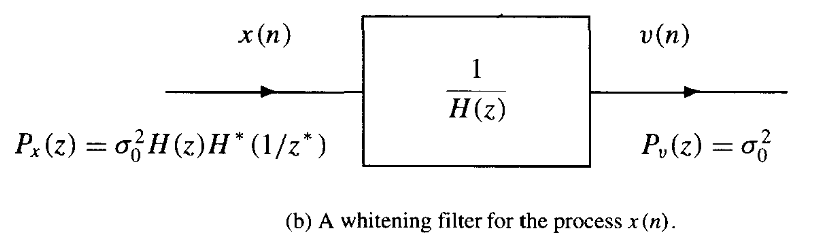

Considérese el siguiente proceso $AR(2)$:

$$
x(n) = -a_1 x(n-1) - a_2 x(n-2) + v(n)
$$

donde $v(n)$ es un ruido blanco de media nula y varianza $\sigma_v^2 = 1$, y: $a_1=0$, $a_2=0.81$, $b_0=1$. Se pide resolver las siguientes cuestiones:
___
# EJERCICIO 1 
___
**Obtener y dibujar la autocorrelación** $r_x(k)$, para:

   $$
   k = -(N - 1), \dots, N - 1; \quad N = 32
   $$

   y el **espectro** $P_x(\omega)$ originado por el proceso $AR(2)$. La autocorrelación deberá deducirse de las **ecuaciones de Yule-Walker**, y el espectro a partir de la expresión analítica correspondiente:

   $$
   \hat{P}_x(\omega) = \frac{\sigma_v^2}{\left|1 + a_1 e^{-j\omega} + a_2 e^{-j2\omega} \right|^2} = \frac{\sigma_v^2}{\left|\mathcal{F}[a_k]\right|^2} \tag{4}
   $$


### Ecuaciones Yule-Walker

Consideramos un proceso autoregresivo de orden 2 $AR(2)$ descrito por la ecuación:

$$
x(n) + a_1 x(n-1) + a_2 x(n-2) = v(n)
$$

donde $v(n)$ es un ruido blanco con media nula y varianza $\sigma_v^2$. Las ecuaciones de Yule-Walker para un proceso AR(2), para $k \geq 0$, son:

\begin{cases}
r_x(0) + a_1 r_x(1) + a_2 r_x(2) = \sigma_v^2 \\
r_x(k) + a_1 r_x(k-1) + a_2 r_x(k-2) = 0 \quad \text{para } k > 0
\end{cases}

En nuestro caso: $\sigma_v^2 = 1$, $a_1 = 0$, $a_2 = 0.81$

- Para $k = 0$: $\qquad r_x(0) + 0.81 \cdot r_x(2) = 1 $

- Para $k = 1$: $\qquad r_x(1) + 0.81 \cdot r_x(-1) = 0$

Como la autocorrelación es una función par: $r_x(-1) = r_x(1)$, se obtiene: $\qquad r_x(1)(1 + 0.81) = 0 \Rightarrow r_x(1) = 0$


- Para $k = 2$: $\qquad r_x(2) + 0.81 \cdot r_x(0) = 0 \Rightarrow r_x(2) = -0.81 \cdot r_x(0)$

Sustituyendo en la ecuación de $k = 0$:

\begin{align}
r_x(0) + 0.81(-0.81 \cdot r_x(0)) &= 1 \\
r_x(0)(1 - 0.81^2) &= 1 \\
r_x(0) &= \frac{1}{1 - 0.6561} = \frac{1}{0.3439} \approx 2.907
\end{align}

Entonces, sustituyendo, $r_x(1) = 0 $ y $r_x(2) = -0.81 \cdot 2.907 \approx -2.354$

- Para $k > 2$, la autocorrelación se obtiene por la ecuación recursiva:

$$
r_x(k) = -a_1 r_x(k-1) - a_2 r_x(k-2)
$$

- Para $k < 0$, se usa:

$$
r_x(-k) = r_x(k)
$$



### Espectro de potencia $P_x(\omega)$

La función de densidad espectral de potencia para un proceso $AR(2)$ es:

$$
P_x(\omega) = \frac{\sigma_v^2}{|1 + a_1 e^{-j\omega} + a_2 e^{-j2\omega}|^2} = P_x(\omega) = \frac{1}{|1 + 0.81 e^{-j2\omega}|^2}
$$

Este espectro se puede evaluar numéricamente para $\omega \in [-\pi, \pi]$ y graficar para visualizar cómo se distribuye la energía del proceso en frecuencia.


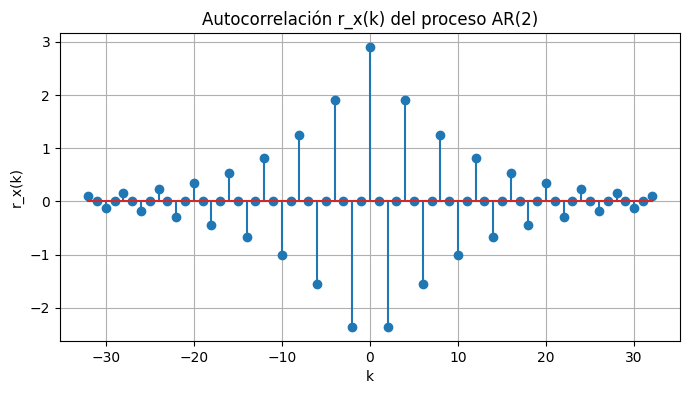

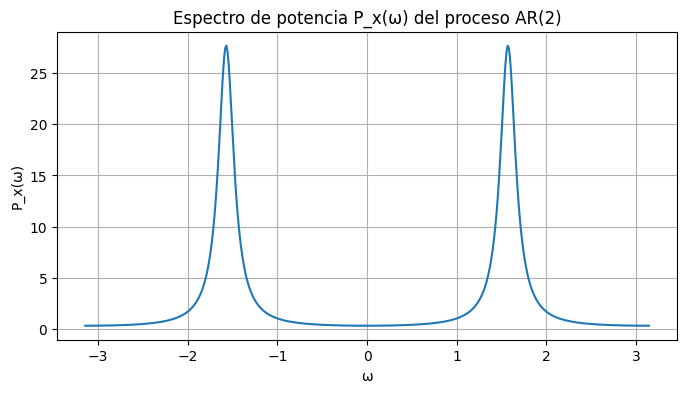

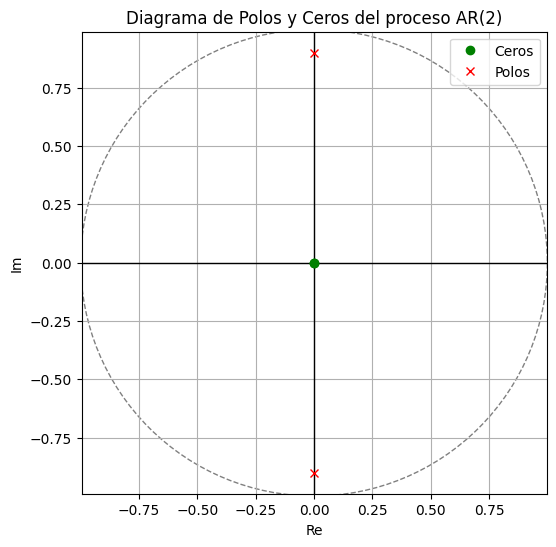

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


#* ---------------------------------------------
#* Parametros del proceso AR(2)
#* ---------------------------------------------
a1 = 0.0
a2 = 0.81
sigma_v2 = 1.0  # Varianza del ruido v(n)
N = 32          # Rango para la autocorrelacion: -N,...,N

#* ---------------------------------------------
#* Calculo de r_x(0), r_x(1) y r_x(2) usando Yule-Walker
#* ---------------------------------------------
# De las ecuaciones:
#?   r_x(0) + a1*r_x(1) + a2*r_x(2) = sigma_v2
#?   r_x(1) + a1*r_x(0) + a2*r_x(1) = 0         -> r_x(1) = 0
#?   r_x(2) + a1*r_x(1) + a2*r_x(0) = 0         -> r_x(2) = -a2*r_x(0)

# Formamos el sistema de ecuaciones
#   [1 a1 a2] [r_x(0)] = [sigma_v2]
#   [a1 1 a1] [r_x(1)] = [0]
#   [a2 a1 1] [r_x(2)] = [0]
#
a123 = np.array([
        [1,  a1,  a2], 
        [a1,  1,  a1], 
        [a2,  a1,  1]
])
b123 = np.array([sigma_v2, 0, 0])
r012 = np.linalg.solve(a123, b123) # Resolvemos el sistema

r0 = r012[0] # r_x(0)
r1 = r012[1] # r_x(1)
r2 = r012[2] # r_x(2)
 
#* ---------------------------------------------
#* Generar r_x(k) para k = 0,...,N usando la recurrencia
#*    r_x(k) = -a1*r_x(k-1) - a2*r_x(k-2)
#* ---------------------------------------------
r_pos = np.zeros(N+1)  # r_pos[k] almacenara r_x(k) para k>=0
r_pos[0] = r0
if N >= 1:
    r_pos[1] = r1
if N >= 2:
    r_pos[2] = r2
for k in range(3, N+1):
    r_pos[k] = -a1*r_pos[k-1] - a2*r_pos[k-2]

# Ahora construimos r_x(k) completo para k = -N..N
r_full = np.zeros(2*N+1)
# Indice 0 corresponde a k=-N, y el indice N corresponde a k=0, etc.
for k in range(-N, N+1):
    if k < 0:
        r_full[k+N] = r_pos[-k] # r_x(k) = r_x(-k)
    else:
        r_full[k+N] = r_pos[k]

#* ---------------------------------------------
#* Graficar la autocorrelacion
#* ---------------------------------------------
k_vals = np.arange(-N, N+1)
plt.figure(figsize=(8,4))
plt.stem(k_vals, r_full)
plt.title('Autocorrelación r_x(k) del proceso AR(2)')
plt.xlabel('k')
plt.ylabel('r_x(k)')
plt.grid(True)
plt.show()

#* ---------------------------------------------
#* Espectro de potencia P_x(ω)
#*    P_x(ω) = sigma_v^2 / |1 + a1 e^{-jω} + a2 e^{-j2ω}|^2
#* ---------------------------------------------
# Evaluamos para w en [-pi, pi]
w = np.linspace(-np.pi, np.pi, 512)
# Numerador = sigma_v^2 = 1
# Denominador = |1 + a1 e^{-j w} + a2 e^{-j 2w}|^2, En nuestro caso: 1 + 0.81*e^{-j 2w}
P_x = []
for omega in w:
    H = 1.0 + a2 * np.exp(-1j * 2.0 * omega)
    P_x.append(1.0 / np.abs(H)**2) # Append introduces a new element at the end of the list

P_x = np.array(P_x)

# Graficamos el espectro
plt.figure(figsize=(8,4))
plt.plot(w, P_x)
plt.title('Espectro de potencia P_x(ω) del proceso AR(2)')
plt.xlabel('ω')
plt.ylabel('P_x(ω)')
plt.grid(True)
plt.show()

#* ---------------------------------------------
#* Diagrama de polos y ceros
#* H(z) = 1/(1 + a1*z + a2*z^2)
#* ---------------------------------------------
# Coeficientes del sistema
# H(z) = b(z) / a(z) = b0 / (1 + a1 z^{-1} + a2 z^{-2})
# scipy.signal.tf2zpk espera coeficientes en forma decrescente: z^n + ... + z^0
b = [1, 0, 0]         # numerador
a = [1, a1, a2]       # denominador: A(z) = 1 + a1 z^{-1} + a2 z^{-2}

# Obtener ceros, polos y ganancia
z, p, k = signal.tf2zpk(b, a)

# Diagrama de polos y ceros
plt.figure(figsize=(6,6))
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Dibujar círculo unidad
circle = plt.Circle((0,0), radius=1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Dibujar polos y ceros
plt.plot(np.real(z), np.imag(z), 'go', label='Ceros')   # green 'o'
plt.plot(np.real(p), np.imag(p), 'rx', label='Polos')   # red 'x'

plt.title('Diagrama de Polos y Ceros del proceso AR(2)')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


___
# EJERCICIO 2
___
En lo sucesivo trabajaremos sobre una realización (señal) del proceso $AR(2)$ definido anteriormente con una duración $N = 32$.

Para ello, generaremos **1000 muestras del proceso $AR(2)$** filtrando (comando `filter` en **Matlab**, o `lfilter` de `scipy.signal` en **Python**) **ruido blanco Gaussiano**, y nos quedaremos con la señal de salida correspondiente a las **$N = 32$ últimas muestras** (para evitar el periodo transitorio inicial en el filtrado).


Últimas 32 muestras del proceso AR(2):
[ 0.78518508 -1.77768096  0.07874573  1.20619752  0.64367367 -0.2000883
  1.08653939  1.51552517  0.46647476  0.21609493 -0.08646557 -0.14285181
  0.94285419  0.84779092 -1.07277813 -0.28188723  0.83385382 -0.62560425
  0.61503915  0.56193869  1.55052655 -2.08066261 -1.81270528  1.71797555
  2.60567237 -0.99209082 -1.80012187 -0.32367023  0.30115732  0.58467754
 -1.60804342 -1.00546656]


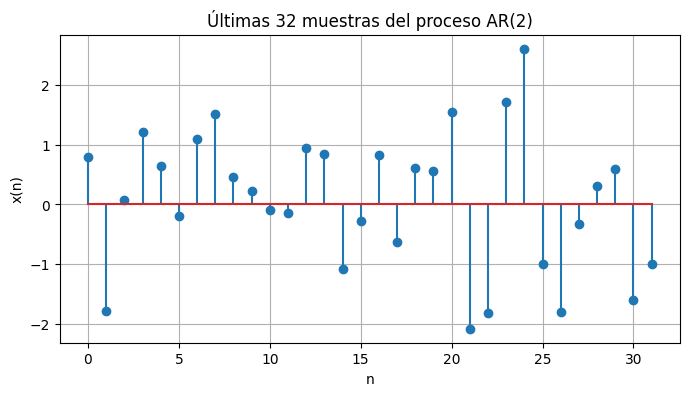

In [69]:
from scipy.signal import lfilter

# Parámetros del proceso AR(2)
a1 = 0.0
a2 = 0.81
b0 = 1.0
N_gen = 1000  # Número total de muestras generadas
N = 32    # Número de muestras finales a conservar

#? Coeficientes del filtro
a = [1.0, a1, a2]   # Denominador: A(z) = 1 + a1*z^{-1} + a2*z^{-2}
b = [b0]           # Numerador: solo b0

#? Generar señal de ruido blanco y filtrar
v = np.random.randn(N) # Generar ruido blanco Gaussiano de media 0 y varianza 1

x_gen = lfilter(b, a, v) # Filtrar la señal: salida del proceso AR(2)

x = x[-N:] # Conservar solo las últimas N muestras (evita el transitorio)

# Mostrar las últimas muestras
print("Últimas 32 muestras del proceso AR(2):")
print(x)

#? Repreesentar las últimas muestras
plt.figure(figsize=(8,4))
plt.stem(np.arange(N), x)
plt.title("Últimas 32 muestras del proceso AR(2)")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid(True)
plt.show()

___
# EJERCICIO 3
___
Estimar la autocorrelación empleando las expresiones de estimación **con y sin sesgo**. Comparar gráficamente con la **verdadera autocorrelación** para:
$$
k = -(N - 1),\dots, N - 1
$$


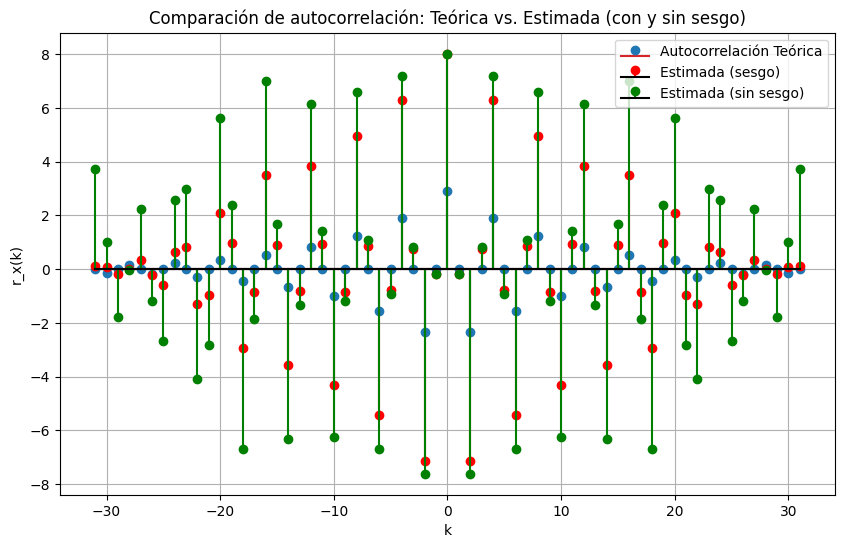

In [94]:

#* ----------------------------------------------------
#* Generar la realización de un proceso AR(2)
#* ----------------------------------------------------
a1 = 0.0
a2 = 0.81
sigma_v2 = 1.0
N_gen = 1000   # número de muestras totales a generar
N = 32         # nos quedamos con las últimas N muestras

# Coeficientes del denominador A(z) = 1 + a1 z^{-1} + a2 z^{-2}
# lfilter usa la forma: y(z)/x(z) = b(z)/a(z)
a = [1.0, a1, a2]   # [1, 0, 0.81]
b = [1.0]           # numerador (b0 = 1)

v = np.random.randn(N_gen) * np.sqrt(sigma_v2) # Generar ruido blanco gaussiano de media 0 y varianza 1

x_gen = lfilter(b, a, v) # Salida del proceso AR(2) al filtrar el ruido
x = x_gen[-N:] # Tomar las últimas N muestras para evitar transitorio

#! ----------------------------------------------------
#! Funciones para autocorrelación estimada
#! ----------------------------------------------------
def autocorr_biased(x, max_lag):
    """
    Estima la autocorrelación con sesgo:
    r_x(k) = (1/N) * sum_{n} x[n] x[n-k]  (ajustada con 'full' y luego /N)
    """
    N = len(x)
    corr = np.correlate(x, x, mode='full')  # longitud 2Nsig - 1
    mid = N - 1                             # índice correspondiente a k=0
    r_biased = []
    k_vals = range(-max_lag, max_lag+1)
    for k in k_vals:
        r_biased.append(corr[mid + k] / N)
    return np.array(r_biased), np.array(list(k_vals))

def autocorr_unbiased(x, max_lag):
    """
    Estima la autocorrelación sin sesgo:
    r_x(k) = (1/(N - |k|)) * sum_{n} x[n] x[n-k]
    """
    N = len(x)
    corr = np.correlate(x, x, mode='full')
    mid = N - 1
    r_unbiased = []
    k_vals = range(-max_lag, max_lag+1)
    for k in k_vals:
        r_unbiased.append(corr[mid + k] / (N - abs(k)))
    return np.array(r_unbiased), np.array(list(k_vals))

#! ----------------------------------------------------
#! Autocorrelación teórica (Yule-Walker)
#! ----------------------------------------------------
def theoretical_autocorr(a1, a2, sigma_v2, N):
    """
    Calcula r_x(k) para k = -N ... N usando:
    - Ecuaciones de Yule-Walker (resolviendo sistema de 3x3 para r_x(0:2))
    - Recurrencia para k > 2: r_x(k) = -a1*r_x(k-1) - a2*r_x(k-2)
    - Simetría r_x(-k) = r_x(k)
    
    Devuelve:
      - r_full: vector de autocorrelación para k = -N,...,N
      - k_vals: los valores correspondientes de k
    """
    #? 1. Resolver Yule-Walker (sistema 3x3)
    a012 = np.array([
        [1,  a1,  a2],
        [a1, 1,  a1],
        [a2, a1, 1]
    ])
    b_vector = np.array([sigma_v2, 0, 0])
    r012 = np.linalg.solve(a012, b_vector)

    r0 = r012[0]
    r1 = r012[1]
    r2 = r012[2]

    #? 2. Recurrencia para r_x(k) con k >= 0
    r_pos = np.zeros(N+1)
    r_pos[0] = r0
    if N >= 1:
        r_pos[1] = r1
    if N >= 2:
        r_pos[2] = r2
    for k in range(3, N+1):
        r_pos[k] = -a1*r_pos[k-1] - a2*r_pos[k-2]

    #? 3. Construir r_x(k) para k = -N,...,N
    r_full = np.zeros(2*N + 1)
    for k in range(-N, N+1):
        if k < 0:
            r_full[k+N] = r_pos[-k]
        else:
            r_full[k+N] = r_pos[k]

    k_vals = np.arange(-N, N+1)
    return r_full, k_vals

#* ----------------------------------------------------
#* Calcular autocorrelaciones y comparar
#* ----------------------------------------------------
max_lag = N - 1  # pedimos -31..31 en total

#? Estimada con sesgo
r_biased, k_biased = autocorr_biased(x, max_lag)
#? Estimada sin sesgo
r_unbiased, k_unbiased = autocorr_unbiased(x, max_lag)
#? Teórica (verdadera)
r_theoretical, k_theo = theoretical_autocorr(a1, a2, sigma_v2, max_lag)

#* ----------------------------------------------------
#* Representar gráficamente las tres autocorrelaciones
#* ----------------------------------------------------
plt.figure(figsize=(10,6))

plt.stem(k_theo, r_theoretical, label='Autocorrelación Teórica')
plt.stem(k_biased, r_biased, linefmt='r-', markerfmt='ro', basefmt='k-', label='Estimada (sesgo)')
plt.stem(k_unbiased, r_unbiased, linefmt='g-', markerfmt='go', basefmt='k-', label='Estimada (sin sesgo)')

plt.title('Comparación de autocorrelación: Teórica vs. Estimada (con y sin sesgo)')
plt.xlabel('k')
plt.ylabel('r_x(k)')
plt.grid(True)
plt.legend()
plt.show()


___
# EJERCICIO 4
___ 
Usando las autocorrelaciones estimadas en el apartado anterior, estimar las **PSDs** correspondientes aplicando la **transformada de Fourier**. Comparar gráficamente con el **verdadero espectro**.


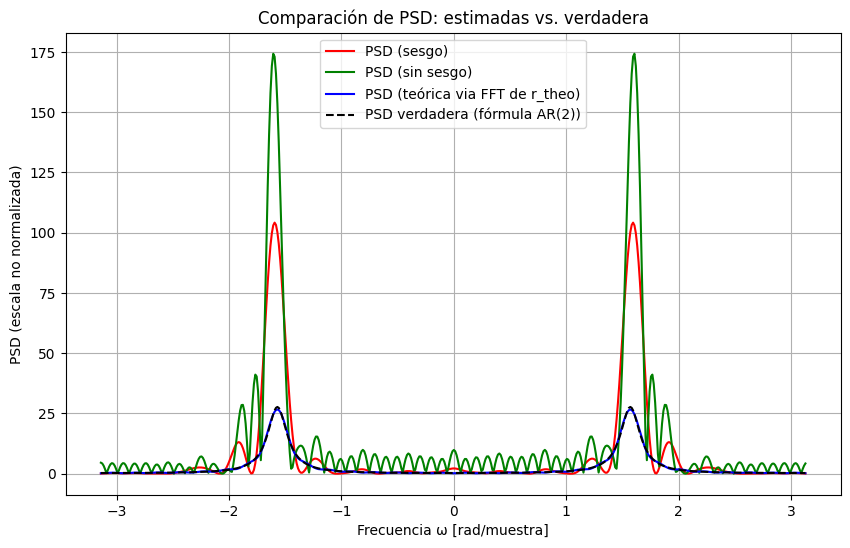

In [113]:
# ----------------------------------------------------------------------------
# Supongamos que ya tenemos:
#   - r_biased   -> autocorrelación estimada con sesgo, de longitud 2N+1
#   - r_unbiased -> autocorrelación estimada sin sesgo, de longitud 2N+1
#   - r_theo     -> autocorrelación teórica, de longitud 2N+1
#
#   - a1, a2, sigma_v2 -> parámetros del proceso AR(2)
#   - N                -> semilongitud (autocorrelación de -N..N)
#
# Si no las tienes, revisa el código del Ejercicio 3.
# Aquí se asume que esas variables YA ESTÁN definidas.
# ----------------------------------------------------------------------------

def psd_autocorr(r, n_fft=512):
    """
    Calcula la PSD a partir de la autocorrelación r(k), usando FFT.
    Asume que r está indexada en k = -N..N y es real y par (r(-k) = r(k)).
    
    Parámetros:
      - r: array 1D (longitud 2N+1) con la autocorrelación
      - n_fft: tamaño de la FFT (por defecto 512)
    
    Devuelve:
      - PSD_est: array 1D con la PSD (desplazada en frecuencia: -pi..pi)
    """
    PSD = np.fft.fft(r, n=n_fft)
    PSD_shifted = np.fft.fftshift(PSD)
    return PSD_shifted


#? Parámetros para la PSD y PSDs experimentales
n_fft = 512
freq = np.linspace(-np.pi, np.pi, n_fft, endpoint=False) # endopoint=False para no incluir pi

PSD_biased = psd_autocorr(r_biased, n_fft=n_fft)
PSD_unbiased = psd_autocorr(r_unbiased, n_fft=n_fft)
PSD_theoretical_fft = psd_autocorr(r_theoretical, n_fft=n_fft)

#? PSD verdadera usando la fórmula AR(2):
#    P_x(ω) = sigma_v^2 / |1 + a1 e^{-jω} + a2 e^{-j2ω}|^2
#    En nuestro caso: a1 = 0, a2 = 0.81, sigma_v2 = 1
PSD_theoretical = []
for w in freq:
    H = 1.0 + a2 * np.exp(-1j * 2.0 * w)  # a1=0
    PSD_theoretical.append(1.0 / (np.abs(H)**2))
PSD_theoretical = np.array(PSD_theoretical)

#* ----------------------------------------------------------------------------
#* GRAFICAR LAS 4 PSDs Y COMPARAR
#* ----------------------------------------------------------------------------
plt.figure(figsize=(10,6))

plt.plot(freq, np.abs(PSD_biased),     'r-',  label='PSD (sesgo)')
plt.plot(freq, np.abs(PSD_unbiased),   'g-',  label='PSD (sin sesgo)')
plt.plot(freq, np.abs(PSD_theoretical_fft),   'b-',  label='PSD (teórica via FFT de r_theo)')
plt.plot(freq, np.abs(PSD_theoretical),'k--', label='PSD verdadera (fórmula AR(2))')

plt.title('Comparación de PSD: estimadas vs. verdadera')
plt.xlabel('Frecuencia ω [rad/muestra]')
plt.ylabel('PSD (escala no normalizada)')
plt.grid(True)
plt.legend()
plt.show()

___
# EJERCICIO 5
___
A partir de la **autocorrelación sesgada**, estimar los valores de los **parámetros del proceso** resolviendo las **ecuaciones de Yule-Walker** (sistema de ecuaciones tipo **Toeplitz**) correspondientes. **Comentar el resultado.**

**NOTA:** construir la matriz **Toeplitz** mediante comando específico.


Para $AR(2)$

\begin{cases}
r_x(k) + a_1 \, r_x(k-1) + a_2 \, r_x(k-2) = 0 \quad (k > 0), \\
r_x(0) + a_1 \, r_x(1) + a_2 \, r_x(2) = \sigma_v^2
\end{cases}

O **equivalentemente**, en forma matricial (Yule-Walker)

$$\begin{bmatrix}
r_x(0) & r_x(1) \\
r_x(1) & r_x(0)
\end{bmatrix}
\begin{bmatrix}
a_1 \\
a_2
\end{bmatrix}
=
-
\begin{bmatrix}
r_x(1) \\
r_x(2)
\end{bmatrix}$$

Luego, para la varianza del ruido

$$\sigma_v^2 \;=\; r_x(0) \;+\; a_1\,r_x(1) \;+\; a_2\,r_x(2)$$


In [109]:
# ----------------------------------------------------------------------------
# Supongamos que ya tenemos:
#   - r_biased -> autocorrelación sesgada, de longitud 2*N+1
#   - N        -> semilongitud (autocorrelación indexada en k = -N..N)
# ----------------------------------------------------------------------------

from scipy.linalg import toeplitz #comando de generacion matrices Toeplitz

#? Extraer r_x(0), r_x(1), r_x(2) de la autocorrelación sesgada
r0 = r_biased[N-1]      # k = 0 (Tener en cuenta que Python indexa desde 0)
r1 = r_biased[N]        # k = 1                ya que para N=32, -31 <= k <= 31
r2 = r_biased[N+1]      # k = 2

#? Construir la matriz Toeplitz para AR(2) y el vector de la parte derecha
# Toeplitz toma como primera columna y primera fila la secuencia que le des
R = toeplitz([r0, r1])    # genera [[r0, r1],
                          #         [r1, r0]]
rhs = -np.array([r1, r2]) # genera -[r1, r2]

#? Resolver para [a1, a2] la ecuación R * [a1, a2]^T = -[r1, r2]^T
a = np.linalg.solve(R, rhs)
a1_est = a[0]
a2_est = a[1]

#? Calcular la varianza del ruido estimada
sigma_v2_est = r0 + a1_est*r1 + a2_est*r2

#* ----------------------------------------------------------------------------
#* MOSTRAR RESULTADOS
#* ----------------------------------------------------------------------------
print("Estimación de parámetros AR(2) usando autocorrelación sesgada + Yule-Walker:")
print(f" a1 estimado = {a1_est:.4f}")
print(f" a2 estimado = {a2_est:.4f}")
print(f" sigma_v^2 estimado = {sigma_v2_est:.4f}")


Estimación de parámetros AR(2) usando autocorrelación sesgada + Yule-Walker:
 a1 estimado = 0.0390
 a2 estimado = 0.8906
 sigma_v^2 estimado = 1.6576


#### Conclusión y explicación del resultado

En la estimación de los parámetros $a_1$ y $a_2$ de un proceso $AR(2)$ mediante las ecuaciones de Yule-Walker (usando la **autocorrelación sesgada**), se han obtenido valores alejados de los que se **esperarían teóricamente** (por ejemplo, $a_1 \approx 0$ y $a_2 \approx 0.81$ en el proceso real). Las causas son:

1. **Pocas muestras disponibles**  
   Si la señal usada para calcular la autocorrelación es **demasiado corta**, la estimación $r_x(k)$ puede presentar **ruido** y no reflejar fielmente la autocorrelación verdadera.

2. **Efecto del sesgo**  
   Al usar el **estimador sesgado** de la autocorrelación, estamos dividiendo por \(N\) en lugar de \(N - |k|\). Esto puede introducir un **sesgo** adicional en la estimación de $r_x(k)$.

3. **Dependencia del método de Yule-Walker**  
   El método de Yule-Walker **asume** que el proceso es exactamente $AR(2)$ y que se conoce la autocorrelación exacta. En la práctica, si $r_x(k)$ es inexacto, la **resolución del sistema** puede llevar a resultados poco fiables.


___
# EJERCICIO 6
___
Con los parámetros del proceso estimados $\hat{a}_1, \hat{a}_2, \hat{\sigma}_v^2$ en el apartado anterior, obtener la **PSD estimada** correspondiente al modelo **$AR(2)$** estimado (usando la **expresión analítica** de la Ecuación (4)).

Comparar con la **PSD original** y con la obtenida a partir de la **autocorrelación con sesgo** (_periodograma_) en el apartado 4.


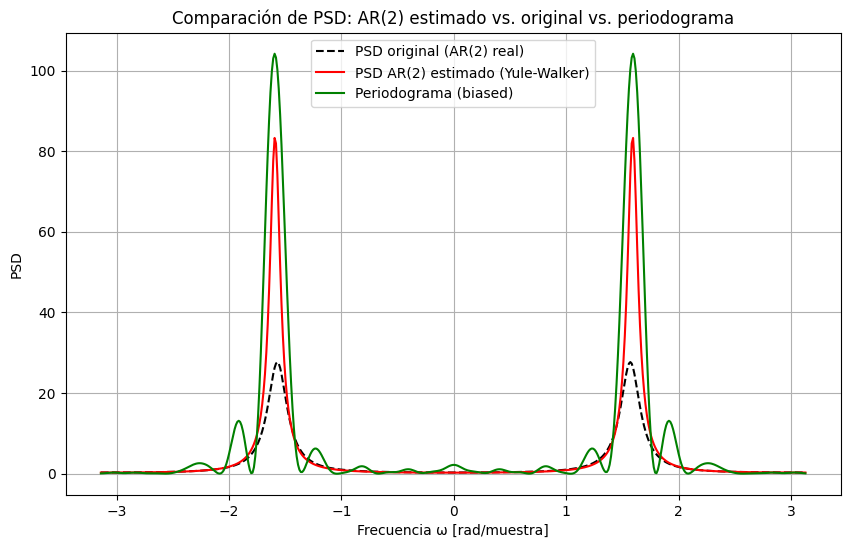

In [116]:
#------------------------------------------------------------------------------
# Supongamos que ya tenemos (de pasos anteriores):
#   - a1_est, a2_est, sigma_v2_est  -> Parámetros estimados por Yule-Walker
#   - a1, a2, sigma_v2 -> Parámetros "reales" (e.g. 0, 0.81, 1)
#   - x_final -> Muestras de la señal AR(2) (ej: las últimas 32 o 1000 muestras)
#   - r_biased -> Autocorrelación sesgada, usada para obtener el "periodograma" (opcional)
#------------------------------------------------------------------------------
from scipy.fft import fft, fftshift

#*------------------------------------------------------------------------------
#* Calcular la PSD "estimada" usando los parámetros estimados
#*------------------------------------------------------------------------------
n_fft = 512
freq = np.linspace(-np.pi, np.pi, n_fft, endpoint=False)

#? PSD teorética usando la fórmula AR(2) en función de los parámetros estimados:
#  P_x(ω) = sigma_v^2 / |1 + a1 e^{-jω} + a2 e^{-j2ω}|^2 (parám. estimados)
PSD_theoretical_est = []
for w in freq:
    H = 1.0 + a1_est * np.exp(-1j * w) + a2_est * np.exp(-1j * 2.0 * w)  
    PSD_theoretical_est.append(1.0 / (np.abs(H)**2))
PSD_theoretical_est = np.array(PSD_theoretical_est)


#*------------------------------------------------------------------------------
#* Graficar las 3 PSDs: AR(2) estimado, AR(2) original, periodograma (biased)
#*------------------------------------------------------------------------------
plt.figure(figsize=(10,6))

plt.plot(freq, np.abs(PSD_theoretical),   'k--', label='PSD original (AR(2) real)')
plt.plot(freq, np.abs(PSD_theoretical_est),    'r-',  label='PSD AR(2) estimado (Yule-Walker)')
plt.plot(freq, np.abs(PSD_biased),'g-',  label='Periodograma (biased)')

plt.title('Comparación de PSD: AR(2) estimado vs. original vs. periodograma')
plt.xlabel('Frecuencia ω [rad/muestra]')
plt.ylabel('PSD')
plt.grid(True)
plt.legend()
plt.show()
